# Simple dimensionality reduction


On average, points in higher dimensions tend to be further apart, causing these datasets to be very sparse, leading to poor generalization and overfitting.

## Projection

Training instances are not usually spread out much, so it is often possible to project instances to a much lower-dimensional subspace

## Manifold learning

Often, instances are distributed over a much more complicated manifold, so that projection would lead to instances overlapping. Instead, we can try and find a manifold, that is of lower dimension than the original space, that most of the data maps onto nicely (eg consider a Swiss roll in 3D)

# Principal Component Analysis (PCA)

We identify the hyperplane that lies closest to the data, and then project the data onto the line in that hyperplane that minimises the mean squared distance. This is our first axis.

We also find all the lines orthogonal to this line ($n-1$ in $n$-dimensional space) to get the other axes. 

These axes are collectively the **principal components** of our new system.

Doing this preserves maximum variance in the system.

If the training set matrix is $X$, then we can perform singular value decomposition to get $X=U\Sigma V^\dagger$, where $V$ will be the matrix of singular components.

Note: the data must be centred at the origin

In [1]:
import numpy as np

X = np.array([
    [1., 2., 3.],
    [2., 3., 1.],
    [2., 4., 7.],
    [1., 9., 4.]
])

X_centred = X-X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centred)
c1 = Vt[0]
c2 = Vt[1]

print(f"{c1}\n{c2}")

[ 0.05373056 -0.91743255 -0.39424681]
[ 0.08008175 -0.38958644  0.91750167]


To project down to $d$ dimensions, we project onto the hyperplane defined by the first $d$ PCs. Defining $W_d$ to be the first $d$ columns of $V$:
$$
X_{proj} = XW_d
$$

We can choose the nunmber of dimensions to reduce to by preserving a certain amount of variance:

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml("mnist_784", as_frame=False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

# long way
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

In [5]:
np.argmax(cumsum >= 0.95) + 1

154

In [6]:
# easy way

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train)

In [7]:
pca.n_components_

154

Text(0, 0.5, 'Explained Variance')

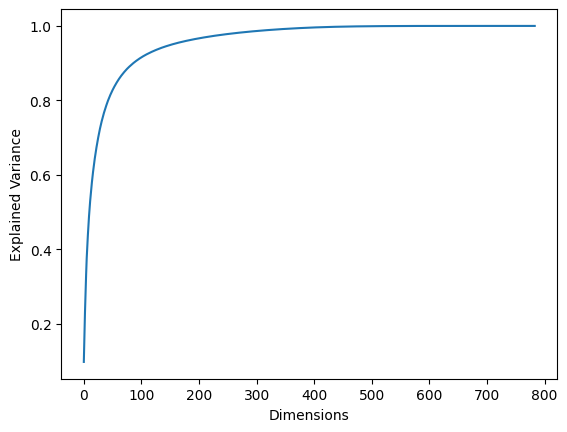

In [10]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

## Optimizing PCAs
We can also optimize the number of PCA dimensions, and we see that we don't actually need that many:

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_dist = {
    "pca__n_components": np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(
    clf,
    param_dist,
    n_iter=10,
    cv = 3,
    random_state=42,
    verbose=10
)

rnd_search.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START pca__n_components=62, randomforestclassifier__n_estimators=304
[CV 1/3; 1/10] END pca__n_components=62, randomforestclassifier__n_estimators=304;, score=0.862 total time=   1.0s
[CV 2/3; 1/10] START pca__n_components=62, randomforestclassifier__n_estimators=304
[CV 2/3; 1/10] END pca__n_components=62, randomforestclassifier__n_estimators=304;, score=0.856 total time=   0.8s
[CV 3/3; 1/10] START pca__n_components=62, randomforestclassifier__n_estimators=304
[CV 3/3; 1/10] END pca__n_components=62, randomforestclassifier__n_estimators=304;, score=0.850 total time=   0.8s
[CV 1/3; 2/10] START pca__n_components=45, randomforestclassifier__n_estimators=95
[CV 1/3; 2/10] END pca__n_components=45, randomforestclassifier__n_estimators=95;, score=0.832 total time=   0.2s
[CV 2/3; 2/10] START pca__n_components=45, randomforestclassifier__n_estimators=95
[CV 2/3; 2/10] END pca__n_components=45, randomforestclassifie

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42, verbose=10)

In [13]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

## PCA as a compression algorithm

The PCA behaves a bit like a compression algorithm. We can uncompress to get most of the data back:

In [14]:
X_recovered = pca.inverse_transform(X_reduced)

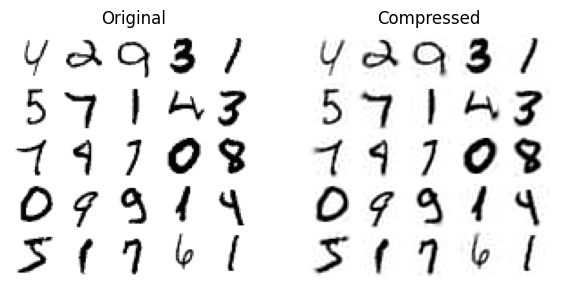

In [15]:
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

plt.show()

## Randomised PCAs

Randomised PCAs can be much more efficient, when $d\ll n$

In [16]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCAs

If the dataset is too large to fit in memory, we can use `np.memmap` as well as `IncrementalPCA`:

In [17]:
filename = "mnist.mmap"

X_mmap = np.memmap(filename, dtype="float32", mode="write", shape = X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

In [18]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=6000, n_components=154)

# Random projection

Using the Johnson-Lindenstrauss lemma, we can project using a random linear projection, without losing too much info. We specify the number of instances $m$ and the maximum change in the squared distance between points $\varepsilon$:

In [20]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, epsilon = 5000, 0.1

d=johnson_lindenstrauss_min_dim(m, eps = epsilon,)

In [22]:
n = 20000
np.random.seed(42)
P = np.random.randn(d, n)/np.sqrt(d) # projection matrix

X = np.random.randn(m, n) # fake dataset

X_reduced = X@P.T

We can do this using `GaussianRandomProjection`

In [23]:
from sklearn.random_projection import GaussianRandomProjection
gaussian_rand_proj = GaussianRandomProjection(eps=epsilon, random_state=42)

X_reduced = gaussian_rand_proj.fit_transform(X)

To drastically reduce memory requirements, we can use a sparse matrix instead. The density determines the chance of a given entry being non-zero

In [24]:
from sklearn.random_projection import SparseRandomProjection

sparse_rand_proj = SparseRandomProjection(eps=epsilon, random_state=42)

X_reduced = sparse_rand_proj.fit_transform(X)

# Locally Linear Embedding

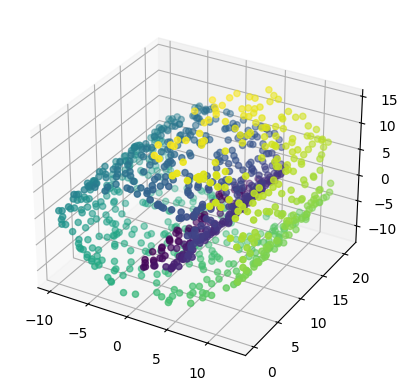

In [30]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

cmap = plt.get_cmap("jet")
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*X_swiss.T, c=t)
plt.show()

The exact process is complicated, but the algorithm tries to reconstruct each point $\bm{x_i}$ as a linear function of its $k$ nearest neighbours by picking $k$ weights $w_{i,j}.

This produces a weight matrix $W$ encoding these relationships. We then map all the training instances to a lower dimensional space $d<n$ preserving these local relationships as much as possible; if $\bm{z_i}$ is the image of $\bm{x_i}$, then we aim to minimise

$$
\sum_{i=1}^m \left(\bm{z_i} - \sum_{j=1}^k w_{i,j} \bm{z_j} \right)^2
$$

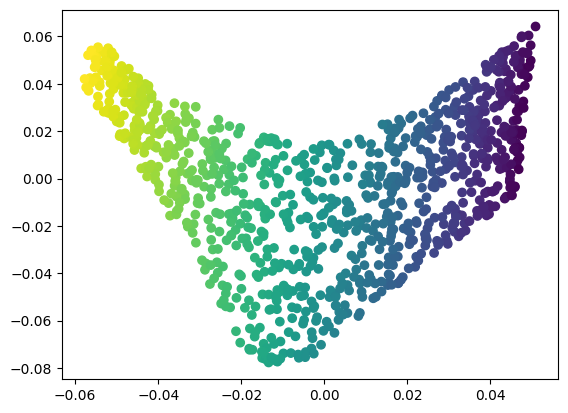

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)


cmap = plt.get_cmap("jet")
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(*X_unrolled.T, c=t)

# Other methods

There are several other methods, detailed in the textbook.

# 9


Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an `SGDClassifier`. How much does PCA help now?

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

%time rfc.fit(X_train, y_train)

CPU times: total: 1min 36s
Wall time: 9.85 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc.predict(X_test))

0.9705

In [48]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_rfc = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    verbose=10
)

%time pca_rfc.fit(X_train, y_train)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 2) Processing pca, total=   6.4s
[Pipeline]  (step 2 of 2) Processing randomforestclassifier, total=  36.0s
CPU times: total: 7min 20s
Wall time: 42.4 s


Pipeline(steps=[('pca', PCA(n_components=0.95, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))],
         verbose=10)

In [49]:
accuracy_score(y_test, pca_rfc.predict(X_test))

0.9481

So, PCA was a bad idea, since training took much longer, and accuracy was reduced. Let's try a `SGDClassifier` instead:

In [51]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42, n_jobs=-1)

%time sgd.fit(X_train, y_train)

CPU times: total: 4min 11s
Wall time: 43.4 s


SGDClassifier(n_jobs=-1, random_state=42)

In [52]:
accuracy_score(y_test, sgd.predict(X_test))

0.874

In [54]:
pca_rfc = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    SGDClassifier(n_jobs=-1, random_state=42),
    verbose=10
)

%time pca_rfc.fit(X_train, y_train)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 2) Processing pca, total=   6.4s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   9.0s
CPU times: total: 1min 36s
Wall time: 15.4 s


Pipeline(steps=[('pca', PCA(n_components=0.95, random_state=42)),
                ('sgdclassifier', SGDClassifier(n_jobs=-1, random_state=42))],
         verbose=10)

In [55]:
accuracy_score(y_test, pca_rfc.predict(X_test))

0.8959

This worked much better, since training time was reduced, and we got a better accuracy

# 10

Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms, such as PCA, LLE, or MDS, and compare the resulting visualizations.

In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    init="random",
    learning_rate="auto",
    random_state=42
)

X_embedded = tsne.fit_transform(X_train[:5000], y_train[:5000])

CPU times: total: 1min 45s
Wall time: 18.2 s


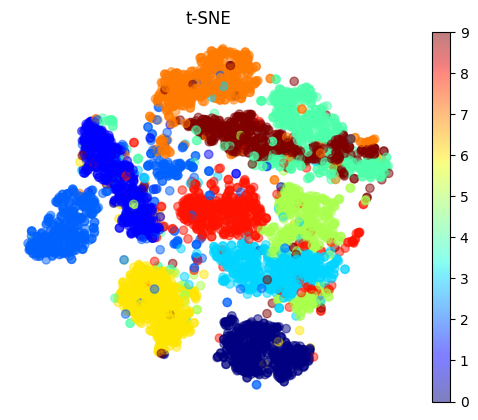

In [65]:
plt.scatter(
    *X_embedded.T,
    c=y_train[:5000].astype(np.int8), 
    cmap="jet", 
    alpha=0.5
)
plt.colorbar()
plt.axis("off")
plt.title("t-SNE")
plt.show()

In [67]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(
    n_components=2,
    n_jobs=-1,
    random_state=42
)

%time X_embedded = lle.fit_transform(X_train[:5000], y_train[:5000])

CPU times: total: 12.1 s
Wall time: 6.25 s


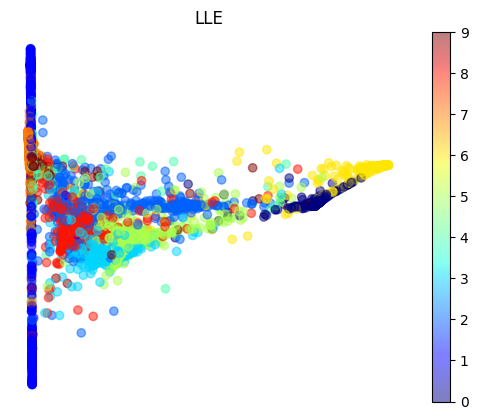

In [69]:
plt.scatter(
    *X_embedded.T,
    c=y_train[:5000].astype(np.int8), 
    cmap="jet", 
    alpha=0.5
)
plt.colorbar()
plt.axis("off")
plt.title("LLE")
plt.show()

In [70]:
pca = PCA(n_components=2, random_state=42)

%time X_embedded = pca.fit_transform(X_train[:5000], y_train[:5000])

CPU times: total: 984 ms
Wall time: 161 ms


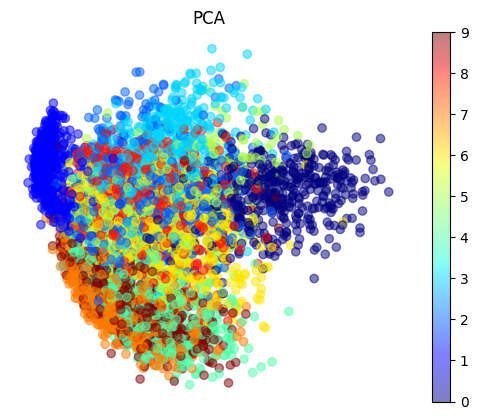

In [71]:
plt.scatter(
    *X_embedded.T,
    c=y_train[:5000].astype(np.int8), 
    cmap="jet", 
    alpha=0.5
)
plt.colorbar()
plt.axis("off")
plt.title("PCA")
plt.show()

# Messing around with TSNE

In [74]:
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svc_pipe = make_pipeline(
    TSNE(init="random", learning_rate="auto", random_state=42),
    LinearSVC(random_state=42)
)

param_grid = {
    "tsne__n_components": [2,3,4,5],
    #"linearsvc_c": [0.1,0.5,1,5,10,50]
}

grid_search = GridSearchCV(
    svc_pipe,
    param_grid=param_grid,
    n_jobs=-1,
    verbose=10,
    cv=3
)

grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 350, in _fit
    self._validate_steps()
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 234, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(init='random', random_state=42)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 350, in _fit
    self._validate_steps()
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 234, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(init='random', n_components=3, random_state=42)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 350, in _fit
    self._validate_steps()
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 234, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(init='random', n_components=4, random_state=42)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 350, in _fit
    self._validate_steps()
  File "c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\pipeline.py", line 234, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(init='random', n_components=5, random_state=42)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't
